In [1]:
import pandas as pd
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
import numpy as np
#from matplotlib import pyplot

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [2]:
data = pd.read_csv('Vietnam_Corona_Worldometer.csv', index_col = 0)
data.head()

,Date,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,1 Case every X ppl,1 Death every X ppl,1 Test every X ppl,Tot Cases/1M ppl
0,Date0809,841,29,11,1,395,0,435,0,9,1,482456,4952,115850,8857296,202,0
1,Date0810,841,0,13,2,399,4,429,0,9,0,482456,4952,115853,7494819,202,0
2,Date0811,866,19,16,1,399,0,451,0,9,2,482456,4951,112517,6089988,202,0
3,Date0812,883,17,17,1,409,10,457,0,9,2,621823,6382,110351,5731754,157,0
4,Date0813,911,28,21,4,425,16,465,0,9,2,621823,6381,106962,4640105,157,0


In [3]:
def parseTime(x):
    return datetime.strptime('2020-' + x[-4:-2] + "-" + x[-2:], '%Y-%m-%d')

In [4]:
date = []
for d in data.Date:
    date.append(parseTime(d))
data["Date"] = date

In [5]:
df = pd.Series(data["Total Cases"].values, index = data["Date"])
df.head()

Date
2020-08-09    841
2020-08-10    841
2020-08-11    866
2020-08-12    883
2020-08-13    911
dtype: int64

In [6]:
model = ARIMA(df, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   39
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -122.340
Method:                       css-mle   S.D. of innovations              5.474
Date:                Mon, 21 Sep 2020   AIC                            258.681
Time:                        23:00:19   BIC                            270.326
Sample:                    08-10-2020   HQIC                           262.859
                         - 09-17-2020                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5902      4.278      1.540      0.123      -1.795      14.975
ar.L1.D.y      0.2755      0.178      1.549      0.121      -0.073       0.624
ar.L2.D.y      0.5115      0.183      2.796      0.0

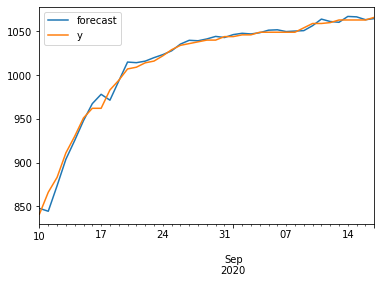

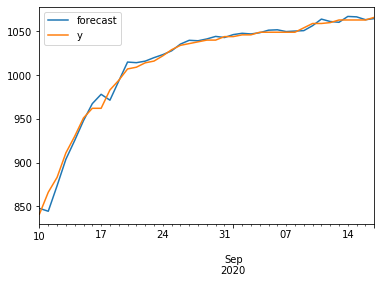

In [7]:
model_fit.plot_predict(dynamic=False)

In [8]:
predicts = list()
his = list(df.values)
nextDays = ["2020/9/18", "2020/9/19", "2020/9/20", "2020/9/21", "2020/9/22"]
actuals = [1068, 1068, 1068, 1068, np.NaN]
for t in range(len(nextDays)):
    model = ARIMA(his, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = round(model_fit.forecast()[0][0], 0)
    predicts.append(output)
    his.append(actuals[t])
for i in range(len(nextDays)):
    print("Date " + str(nextDays[i]) + "\t Predict: " + str(predicts[i]) 
          + "\t Actual: " + str(actuals[i]))

Date 2020/9/18	 Predict: 1069.0	 Actual: 1068
Date 2020/9/19	 Predict: 1071.0	 Actual: 1068
Date 2020/9/20	 Predict: 1069.0	 Actual: 1068
Date 2020/9/21	 Predict: 1069.0	 Actual: 1068
Date 2020/9/22	 Predict: 1070.0	 Actual: nan
